In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
RawData = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')

In [3]:
RawData.shape

(155507, 19)

In [4]:
RawData.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [5]:
RawData['ARREST_KEY'].is_unique

True

In [6]:
# Level of offense: felony, inchoate, misdemeanor, violation
RawData.groupby(['LAW_CAT_CD'])['ARREST_KEY'].count()

LAW_CAT_CD
F    70867
I      230
M    82632
V      385
Name: ARREST_KEY, dtype: int64

### I am interested in felonies. 

In [7]:
# Dropping columns that I think are unecessary.
drop_cols = ['PD_CD','PD_DESC','KY_CD','JURISDICTION_CODE','X_COORD_CD','Y_COORD_CD','Latitude','Longitude','New Georeferenced Column','LAW_CODE']
RawData.drop(drop_cols, inplace = True, axis=1)

In [8]:
RawData.head()

,ARREST_KEY,ARREST_DATE,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
0,238013474,12/18/2021,RAPE,F,Q,105,18-24,M,BLACK
1,236943583,11/25/2021,ARSON,F,K,69,25-44,M,BLACK
2,234938876,10/14/2021,SEX CRIMES,F,K,61,25-44,M,WHITE
3,234788259,10/11/2021,ARSON,F,B,42,18-24,M,BLACK
4,234188790,09/28/2021,NaN,M,B,44,25-44,M,BLACK


In [9]:
# Renaming columns to something that makes sense to me.
RawData.rename(columns={'ARREST_DATE': 'Date', 'OFNS_DESC': 'Offence', 'LAW_CAT_CD': 'Offence Level', 'ARREST_BORO': 'Borough', 'ARREST_PRECINCT': 'Precinct',  'AGE_GROUP': 'Age Group', 'PERP_SEX': 'Sex', 'PERP_RACE': 'Race'}, inplace=True)
RawData.head()

,ARREST_KEY,Date,Offence,Offence Level,Borough,Precinct,Age Group,Sex,Race
0,238013474,12/18/2021,RAPE,F,Q,105,18-24,M,BLACK
1,236943583,11/25/2021,ARSON,F,K,69,25-44,M,BLACK
2,234938876,10/14/2021,SEX CRIMES,F,K,61,25-44,M,WHITE
3,234788259,10/11/2021,ARSON,F,B,42,18-24,M,BLACK
4,234188790,09/28/2021,NaN,M,B,44,25-44,M,BLACK


In [10]:
# Checking for null values.
RawData.isnull().sum()

ARREST_KEY          0
Date                0
Offence           103
Offence Level    1393
Borough             0
Precinct            0
Age Group           0
Sex                 0
Race                0
dtype: int64

In [11]:
# There are a lot of nulls. Going to filter this down to felonies to see if that limits the amount of nulls.
FelonyRawData = RawData[RawData['Offence Level'] == 'F']
FelonyRawData.shape

(70867, 9)

In [12]:
# Okay not so may nulls now.
# With over 70k entries 46 is not significant I will drop the nulls.
FelonyRawData.isnull().sum()

ARREST_KEY        0
Date              0
Offence          46
Offence Level     0
Borough           0
Precinct          0
Age Group         0
Sex               0
Race              0
dtype: int64

In [13]:
# Dropping rows with nulls.
FelonyRawData.dropna()

,ARREST_KEY,Date,Offence,Offence Level,Borough,Precinct,Age Group,Sex,Race
0,238013474,12/18/2021,RAPE,F,Q,105,18-24,M,BLACK
1,236943583,11/25/2021,ARSON,F,K,69,25-44,M,BLACK
2,234938876,10/14/2021,SEX CRIMES,F,K,61,25-44,M,WHITE
3,234788259,10/11/2021,ARSON,F,B,42,18-24,M,BLACK
5,234117071,09/27/2021,RAPE,F,K,84,25-44,M,BLACK
...,...,...,...,...,...,...,...,...,...
155500,222488090,01/01/2021,CRIMINAL MISCHIEF & RELATED OF,F,Q,115,25-44,M,WHITE HISPANIC
155502,222884924,01/10/2021,ROBBERY,F,B,46,45-64,M,BLACK
155503,223918625,02/03/2021,DANGEROUS WEAPONS,F,K,67,18-24,M,BLACK
155505,222599533,01/04/2021,DANGEROUS WEAPONS,F,K,73,25-44,M,BLACK


In [14]:
# I am still seeing nulls.
FelonyRawData.isnull().sum()

ARREST_KEY        0
Date              0
Offence          46
Offence Level     0
Borough           0
Precinct          0
Age Group         0
Sex               0
Race              0
dtype: int64

In [15]:
# Exporting to see what they look like.
FelonyRawData.to_excel(r'C:\Users\CASDiaz\OneDrive - Healthfirst\Desktop\Anatlytics Class\Python\5th Project\FelonyRawData.xlsx', index = False)

In [16]:
# The nulls are just blanks. Going to change the nulls to 'Unknown'.
FelonyRawData['Offence'].fillna(value='Unknown')

0                                   RAPE
1                                  ARSON
2                             SEX CRIMES
3                                  ARSON
5                                   RAPE
                       ...              
155500    CRIMINAL MISCHIEF & RELATED OF
155502                           ROBBERY
155503                 DANGEROUS WEAPONS
155505                 DANGEROUS WEAPONS
155506    CRIMINAL MISCHIEF & RELATED OF
Name: Offence, Length: 70867, dtype: object

In [17]:
# Okay that did not work. Going to try a different way to drop the rows with missing data in the 'Offence' column.
FelonyRawData.isnull().sum()

ARREST_KEY        0
Date              0
Offence          46
Offence Level     0
Borough           0
Precinct          0
Age Group         0
Sex               0
Race              0
dtype: int64

In [18]:
# Creating a list of rows with missing values.
NullValueList = FelonyRawData.index[FelonyRawData.isnull().any(axis=1)]
NullValueList.shape

(46,)

In [19]:
# Droping rows that are in the NullValueList.
FelonyRawData.drop(NullValueList,0, inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
# Okay! Null rows removed.
FelonyRawData.isnull().sum()

ARREST_KEY       0
Date             0
Offence          0
Offence Level    0
Borough          0
Precinct         0
Age Group        0
Sex              0
Race             0
dtype: int64

In [21]:
# Dropping 'Offence Level' column since I don't need it anymore.
drop_cols = ['Offence Level']
FelonyRawData.drop(drop_cols, inplace = True, axis=1)
FelonyRawData.head()

,ARREST_KEY,Date,Offence,Borough,Precinct,Age Group,Sex,Race
0,238013474,12/18/2021,RAPE,Q,105,18-24,M,BLACK
1,236943583,11/25/2021,ARSON,K,69,25-44,M,BLACK
2,234938876,10/14/2021,SEX CRIMES,K,61,25-44,M,WHITE
3,234788259,10/11/2021,ARSON,B,42,18-24,M,BLACK
5,234117071,09/27/2021,RAPE,K,84,25-44,M,BLACK


In [22]:
# Checking the data type of the Date column.
FelonyRawData.dtypes

ARREST_KEY     int64
Date          object
Offence       object
Borough       object
Precinct       int64
Age Group     object
Sex           object
Race          object
dtype: object

In [23]:
# I want to use the date column. 
# Going to convert it so that it reads as a date.
FelonyRawData['Date'] = pd.to_datetime(FelonyRawData['Date'])
FelonyRawData.dtypes

<ipython-input-23-27ae49142881>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FelonyRawData['Date'] = pd.to_datetime(FelonyRawData['Date'])


ARREST_KEY             int64
Date          datetime64[ns]
Offence               object
Borough               object
Precinct               int64
Age Group             object
Sex                   object
Race                  object
dtype: object

In [24]:
# Creating column for to denote month.
FelonyRawData['Month #'] = pd.DatetimeIndex(FelonyRawData['Date']).month
FelonyRawData.head()

<ipython-input-24-bc9bb8618953>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FelonyRawData['Month #'] = pd.DatetimeIndex(FelonyRawData['Date']).month


,ARREST_KEY,Date,Offence,Borough,Precinct,Age Group,Sex,Race,Month #
0,238013474,2021-12-18,RAPE,Q,105,18-24,M,BLACK,12
1,236943583,2021-11-25,ARSON,K,69,25-44,M,BLACK,11
2,234938876,2021-10-14,SEX CRIMES,K,61,25-44,M,WHITE,10
3,234788259,2021-10-11,ARSON,B,42,18-24,M,BLACK,10
5,234117071,2021-09-27,RAPE,K,84,25-44,M,BLACK,9


In [25]:
# Creating additional columns for abreviated month.
FelonyRawData['Month'] = pd.to_datetime(FelonyRawData['Month #'], format='%m').dt.month_name().str.slice(stop=3)
FelonyRawData.head()

<ipython-input-25-5d86cd105a37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FelonyRawData['Month'] = pd.to_datetime(FelonyRawData['Month #'], format='%m').dt.month_name().str.slice(stop=3)


,ARREST_KEY,Date,Offence,Borough,Precinct,Age Group,Sex,Race,Month #,Month
0,238013474,2021-12-18,RAPE,Q,105,18-24,M,BLACK,12,Dec
1,236943583,2021-11-25,ARSON,K,69,25-44,M,BLACK,11,Nov
2,234938876,2021-10-14,SEX CRIMES,K,61,25-44,M,WHITE,10,Oct
3,234788259,2021-10-11,ARSON,B,42,18-24,M,BLACK,10,Oct
5,234117071,2021-09-27,RAPE,K,84,25-44,M,BLACK,9,Sep


In [26]:
# Sorting Data by Month
FelonyRawData.sort_values(by='Month #', ascending=True)

,ARREST_KEY,Date,Offence,Borough,Precinct,Age Group,Sex,Race,Month #,Month
139603,223594338,2021-01-26,NYS LAWS-UNCLASSIFIED FELONY,K,90,25-44,M,BLACK HISPANIC,1,Jan
134873,223473656,2021-01-23,DANGEROUS WEAPONS,Q,106,18-24,F,BLACK,1,Jan
143745,223027639,2021-01-13,FORGERY,K,67,25-44,M,BLACK,1,Jan
143747,222624031,2021-01-05,MISCELLANEOUS PENAL LAW,Q,107,18-24,M,BLACK,1,Jan
143749,222844492,2021-01-09,ROBBERY,B,50,<18,M,BLACK HISPANIC,1,Jan
...,...,...,...,...,...,...,...,...,...,...
12880,238309248,2021-12-26,ROBBERY,M,24,25-44,M,BLACK,12,Dec
12890,237386334,2021-12-05,ROBBERY,Q,107,18-24,M,BLACK,12,Dec
12891,238462874,2021-12-30,FELONY ASSAULT,S,120,25-44,M,BLACK,12,Dec
12894,237818224,2021-12-14,FELONY ASSAULT,Q,112,25-44,M,BLACK,12,Dec


In [27]:
# Fixing the sex so that it is just not 1 letter.
FelonyRawData['Sex'].replace('M', 'Male',inplace=True)
FelonyRawData['Sex'].replace('F', 'Female',inplace=True)
FelonyRawData.groupby(['Sex'])['ARREST_KEY'].count()

C:\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Sex
Female    10547
Male      60274
Name: ARREST_KEY, dtype: int64

In [28]:
# Fixing the Borough so that it is just not 1 letter.
FelonyRawData['Borough'].replace('B', 'Bronx',inplace=True)
FelonyRawData['Borough'].replace('K', 'Brooklyn',inplace=True)
FelonyRawData['Borough'].replace('M', 'Manhattan',inplace=True)
FelonyRawData['Borough'].replace('Q', 'Queens',inplace=True)
FelonyRawData['Borough'].replace('S', 'Staten Island',inplace=True)
FelonyRawData.groupby(['Borough'])['ARREST_KEY'].count()

Borough
Bronx            14901
Brooklyn         20935
Manhattan        16811
Queens           15095
Staten Island     3079
Name: ARREST_KEY, dtype: int64

### Going to take a look at how the data looks over time, Borough, Race, Gender and Age Group
    - I still feel like I am getting to know the data.
    - Going to create some visualizations to see if anything stands out.

<AxesSubplot:xlabel='Month #,Month'>

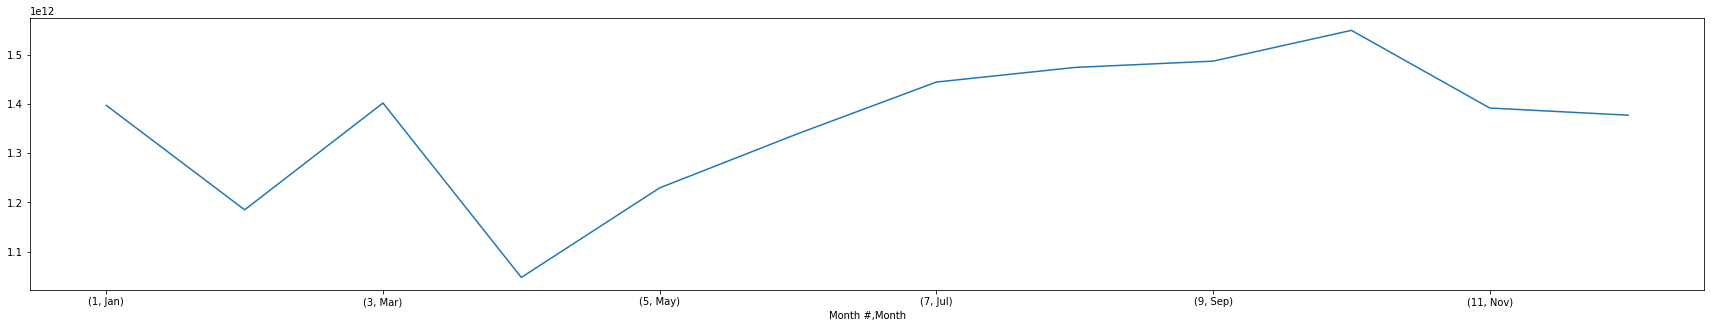

In [29]:
# Looking at arrests over time.
# Had to add the month # column to the information to get it sorted correctly
ArrestsOverTime = pd.pivot_table(FelonyRawData,values="ARREST_KEY",index="Borough",columns=["Month #",'Month'], aggfunc=np.sum)
ArrestsbyMonth = ArrestsOverTime.sum()
ArrestsbyMonth.plot(figsize=(30,5))

<AxesSubplot:ylabel='ARREST_KEY'>

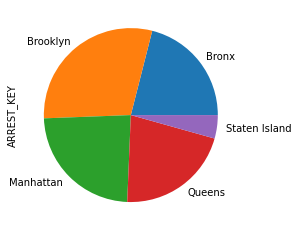

In [30]:
# Taking a look at how the arrests break out by borough.
FelonybyBorough = FelonyRawData.groupby(['Borough'])['ARREST_KEY'].count()
FelonybyBorough.plot.pie()

<AxesSubplot:ylabel='ARREST_KEY'>

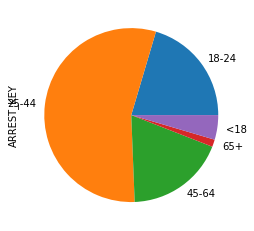

In [31]:
#I was surprized that most of the arrests are for age group 25 - 44
FelonybyAge = FelonyRawData.groupby(['Age Group'])['ARREST_KEY'].count()
FelonybyAge.plot.pie()

<AxesSubplot:ylabel='ARREST_KEY'>

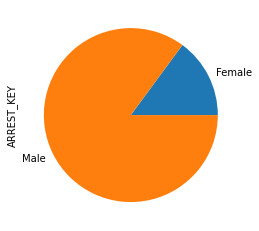

In [32]:
# Not a surprize. Mostly males in the arrest data. 
FelonybySex = FelonyRawData.groupby(['Sex'])['ARREST_KEY'].count()
FelonybySex.plot.pie()

<AxesSubplot:ylabel='ARREST_KEY'>

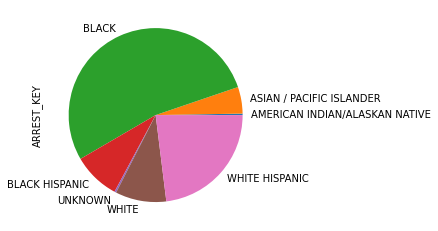

In [33]:
# Race seems really disperportionate.
# This is going to affect the data. 
FelonybyRace = FelonyRawData.groupby(['Race'])['ARREST_KEY'].count()
FelonybyRace.plot.pie()

In [34]:
# Taking a look at the offences listed.
FelonyRawData.groupby(['Offence'])['ARREST_KEY'].count()

Offence
ARSON                                122
BURGLARY                            4895
CHILD ABANDONMENT/NON SUPPORT         28
CRIMINAL MISCHIEF & RELATED OF      4397
DANGEROUS DRUGS                     5489
DANGEROUS WEAPONS                   5473
ENDAN WELFARE INCOMP                  11
ESCAPE 3                               1
FELONY ASSAULT                     15579
FELONY SEX CRIMES                      2
FORGERY                             3127
GAMBLING                              36
GRAND LARCENY                       6671
GRAND LARCENY OF MOTOR VEHICLE      1181
HOMICIDE-NEGLIGENT,UNCLASSIFIE        28
HOMICIDE-NEGLIGENT-VEHICLE            10
INTOXICATED & IMPAIRED DRIVING        39
INTOXICATED/IMPAIRED DRIVING         382
KIDNAPPING                            12
KIDNAPPING & RELATED OFFENSES         85
KIDNAPPING AND RELATED OFFENSES        1
MISCELLANEOUS PENAL LAW            10262
MURDER & NON-NEGL. MANSLAUGHTE      1513
NYS LAWS-UNCLASSIFIED FELONY         706
OFF. AGN

### First going to look at Theft related arrest.
    Theory - Most of the treft related arrest will be out of Manhattan due to it being a financial center and will be perpetrated by middle aged white men.

In [35]:
# Going to group some of these together starting with Thefts & Fraud 
ThefOffencestList = ['BURGLARY','FORGERY ','GRAND LARCENY','GRAND LARCENY OF MOTOR VEHICLE','POSSESSION OF STOLEN PROPERTY','ROBBERY','THEFT-FRAUD']
TheftOffences = FelonyRawData[FelonyRawData['Offence'].isin(ThefOffencestList)]
TheftOffences.groupby(['Offence'])['ARREST_KEY'].count()

Offence
BURGLARY                          4895
GRAND LARCENY                     6671
GRAND LARCENY OF MOTOR VEHICLE    1181
POSSESSION OF STOLEN PROPERTY     1100
ROBBERY                           7848
THEFT-FRAUD                        225
Name: ARREST_KEY, dtype: int64

<AxesSubplot:xlabel='Month #,Month'>

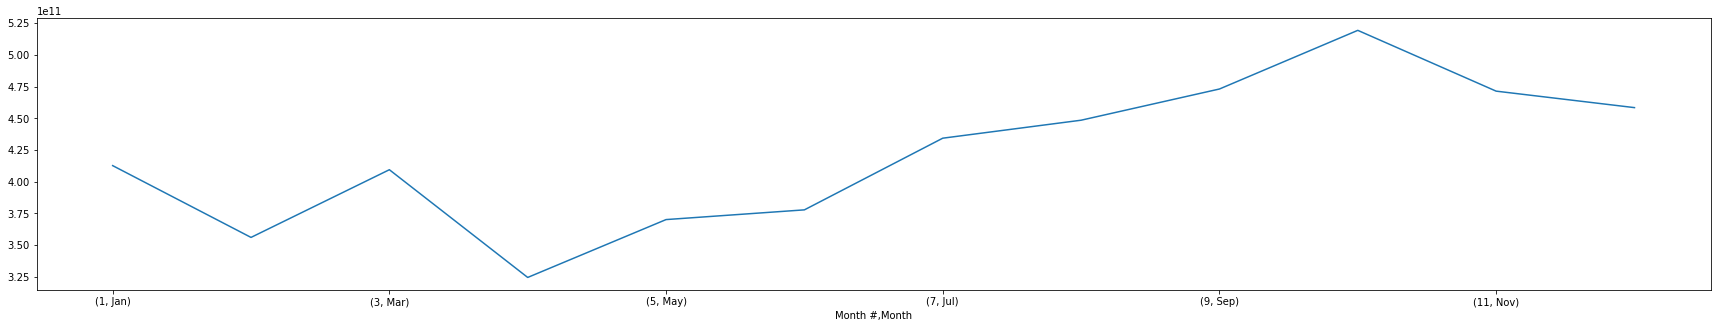

In [36]:
# This looks almost exactly what the total arrest data looked over time.
TheftArrestsOverTime = pd.pivot_table(TheftOffences,values="ARREST_KEY",columns=["Month #",'Month'], aggfunc=np.sum)
TheftArrestsbyMonth = TheftArrestsOverTime.sum()
TheftArrestsbyMonth.plot(figsize=(30,5))

<AxesSubplot:>

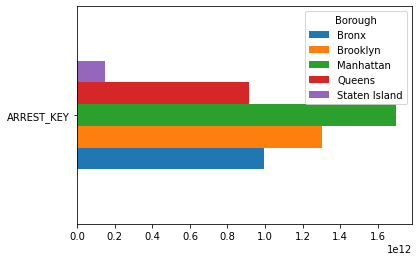

In [37]:
# A majority of theft related crimes were in Manhattan
TheftbyBorough = pd.pivot_table(TheftOffences,values="ARREST_KEY",columns="Borough",aggfunc=np.sum)
TheftbyBorough.plot.barh()

<AxesSubplot:ylabel='ARREST_KEY'>

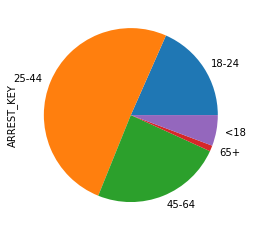

In [38]:
# I was correct a mojority of the arrests were in the 25 - 44 age range.
ManhattanThefts = TheftOffences[TheftOffences['Borough'] == 'Manhattan']
ManhattanTheftbyAge = ManhattanThefts.groupby(['Age Group'])['ARREST_KEY'].count()
ManhattanTheftbyAge.plot.pie()

<AxesSubplot:xlabel='Race'>

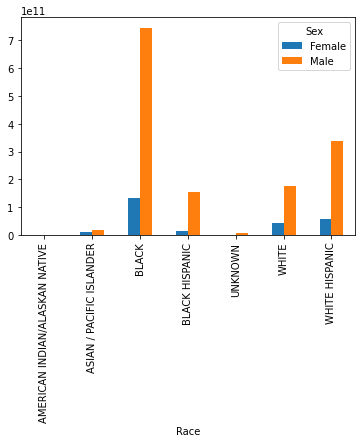

In [39]:
# I was wrong most of the arrest are for black men.
# Would I find the same in other crimes?
ManhattanTheftsbySex = pd.pivot_table(ManhattanThefts,values="ARREST_KEY",index="Race",columns="Sex",aggfunc=np.sum)
ManhattanTheftsbySex.plot.bar()

### Going to look at violent crimes like assault, homicide, and kidnapping
    Theory - Due to the disparity in arrest of black men there will be more arrest among that group.

In [40]:
# Grouping Assualt and Homicide together
AssualtOffencesList = ['FELONY ASSAULT','HOMICIDE-NEGLIGENT,UNCLASSIFIE','HOMICIDE-NEGLIGENT-VEHICLE','MURDER & NON-NEGL. MANSLAUGHTE''FELONY SEX CRIMES','RAPE','SEX CRIMES']
AssualtOffences = FelonyRawData[FelonyRawData['Offence'].isin(AssualtOffencesList)]
AssualtOffences.groupby(['Offence'])['ARREST_KEY'].count()

Offence
FELONY ASSAULT                    15579
HOMICIDE-NEGLIGENT,UNCLASSIFIE       28
HOMICIDE-NEGLIGENT-VEHICLE           10
RAPE                                606
SEX CRIMES                          683
Name: ARREST_KEY, dtype: int64

In [41]:
# Grouping Kidnapping Offences together
KidnappingOffences = FelonyRawData[FelonyRawData['Offence'].str.contains('KIDNAPPING')]
KidnappingOffences.groupby(['Offence'])['ARREST_KEY'].count()

Offence
KIDNAPPING                         12
KIDNAPPING & RELATED OFFENSES      85
KIDNAPPING AND RELATED OFFENSES     1
Name: ARREST_KEY, dtype: int64

In [42]:
# Combining the Kidnapping to the Assualt and Homicide data
AssualtHomicideKidnappingData = pd.concat([KidnappingOffences, AssualtOffences])
AssualtHomicideKidnappingData.groupby(['Offence'])['ARREST_KEY'].count()

Offence
FELONY ASSAULT                     15579
HOMICIDE-NEGLIGENT,UNCLASSIFIE        28
HOMICIDE-NEGLIGENT-VEHICLE            10
KIDNAPPING                            12
KIDNAPPING & RELATED OFFENSES         85
KIDNAPPING AND RELATED OFFENSES        1
RAPE                                 606
SEX CRIMES                           683
Name: ARREST_KEY, dtype: int64

<AxesSubplot:xlabel='Month #,Month'>

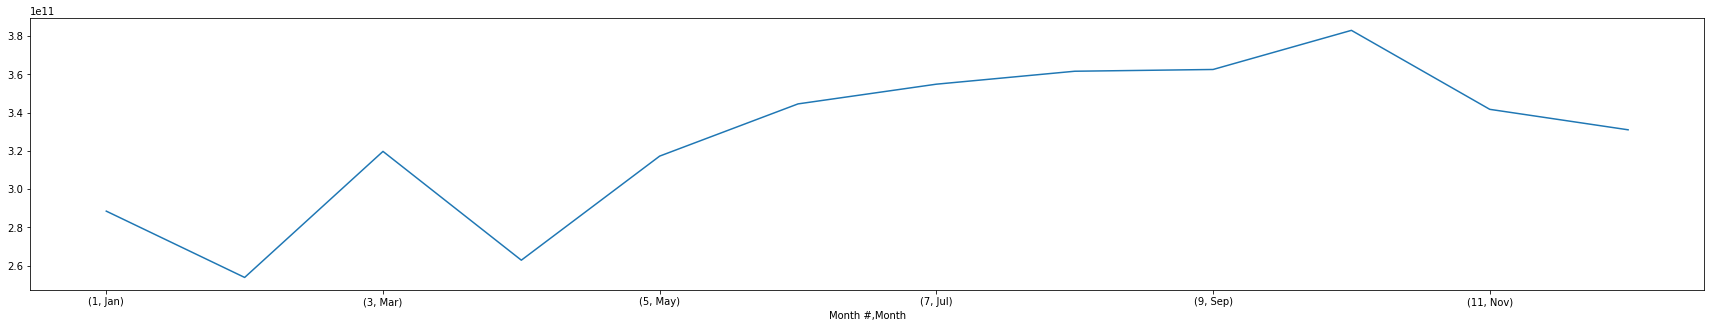

In [43]:
# Again it looks like the total arrest data over time.
ViolentArrestsOverTime = pd.pivot_table(AssualtHomicideKidnappingData,values="ARREST_KEY",columns=["Month #",'Month'], aggfunc=np.sum)
ViolentArrestsbyMonth = ViolentArrestsOverTime.sum()
ViolentArrestsbyMonth.plot(figsize=(30,5))

<AxesSubplot:>

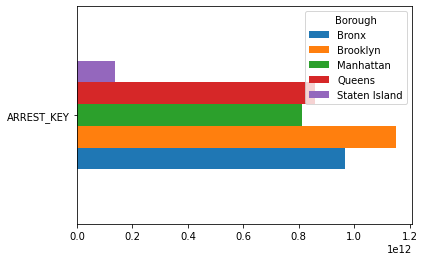

In [44]:
# I honestly was not sure what borough was going to have the most arrests for violent crimes. 
ViolentbyBorough = pd.pivot_table(AssualtHomicideKidnappingData,values="ARREST_KEY",columns="Borough",aggfunc=np.sum)
ViolentbyBorough.plot.barh()

<AxesSubplot:xlabel='Race'>

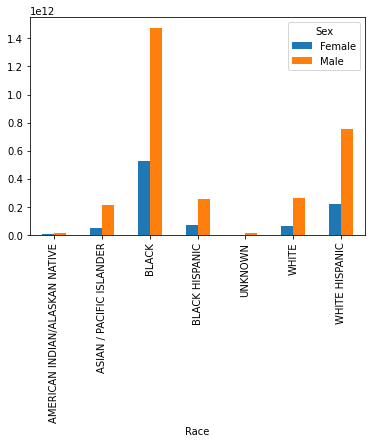

In [45]:
# I was correct due to the black males making up for most of the arrests in the dataframe they account for most of the arrests in violent crimes.
ViolentbyRace = pd.pivot_table(AssualtHomicideKidnappingData,values="ARREST_KEY",index="Race",columns="Sex",aggfunc=np.sum)
ViolentbyRace.plot.bar()

<AxesSubplot:ylabel='ARREST_KEY'>

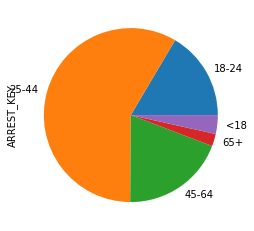

In [46]:
# I was correct a mojority of the arrests were in the 25 - 44 age range.
ViolentbyAge = AssualtHomicideKidnappingData.groupby(['Age Group'])['ARREST_KEY'].count()
ViolentbyAge.plot.pie()

### Going to put the violent crimes and thefts together to compare 

In [47]:
# Adding column to note thease of 'Theft & Fraud'
AssualtHomicideKidnappingData['Offence Type'] = "Violent Crimes"
AssualtHomicideKidnappingData.groupby(['Offence Type','Offence'])['ARREST_KEY'].count()

Offence Type    Offence                        
Violent Crimes  FELONY ASSAULT                     15579
                HOMICIDE-NEGLIGENT,UNCLASSIFIE        28
                HOMICIDE-NEGLIGENT-VEHICLE            10
                KIDNAPPING                            12
                KIDNAPPING & RELATED OFFENSES         85
                KIDNAPPING AND RELATED OFFENSES        1
                RAPE                                 606
                SEX CRIMES                           683
Name: ARREST_KEY, dtype: int64

In [48]:
# Adding column to note thease of 'Theft & Fraud'
TheftOffences['Offence Type'] = "Theft & Fraud"
TheftOffences.groupby(['Offence Type','Offence'])['ARREST_KEY'].count()

<ipython-input-48-81fa3ee85321>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TheftOffences['Offence Type'] = "Theft & Fraud"


Offence Type   Offence                       
Theft & Fraud  BURGLARY                          4895
               GRAND LARCENY                     6671
               GRAND LARCENY OF MOTOR VEHICLE    1181
               POSSESSION OF STOLEN PROPERTY     1100
               ROBBERY                           7848
               THEFT-FRAUD                        225
Name: ARREST_KEY, dtype: int64

In [49]:
# Putting both lists together.
CleanData = pd.concat([TheftOffences, AssualtHomicideKidnappingData])
CleanData.groupby(['Offence Type'])['ARREST_KEY'].count()

Offence Type
Theft & Fraud     21920
Violent Crimes    17004
Name: ARREST_KEY, dtype: int64

In [50]:
# Dropping 'Law Code', 'Precinct' and Offence columns since I will not be using them.
drop_cols = ['Precinct']
CleanData.drop(drop_cols, inplace = True, axis=1)
CleanData.head()

,ARREST_KEY,Date,Offence,Borough,Age Group,Sex,Race,Month #,Month,Offence Type
35,237349642,2021-12-04,GRAND LARCENY OF MOTOR VEHICLE,Manhattan,25-44,Male,BLACK,12,Dec,Theft & Fraud
42,236241282,2021-11-14,GRAND LARCENY,Queens,25-44,Male,BLACK,11,Nov,Theft & Fraud
54,237592429,2021-12-09,ROBBERY,Bronx,25-44,Male,BLACK,12,Dec,Theft & Fraud
72,238227651,2021-12-23,GRAND LARCENY,Manhattan,18-24,Male,BLACK,12,Dec,Theft & Fraud
73,236062037,2021-11-09,GRAND LARCENY,Manhattan,25-44,Female,ASIAN / PACIFIC ISLANDER,11,Nov,Theft & Fraud


Offence Type
Theft & Fraud     21920
Violent Crimes    17004
Name: ARREST_KEY, dtype: int64

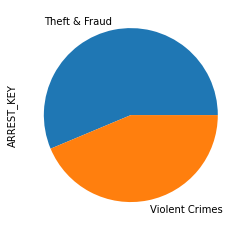

In [51]:
# Looking at the count of offence type.
# I do have more Theft and Fraud arrests but they are pretty even.
ArrestCountbyBorough = CleanData.groupby(['Offence Type'])['ARREST_KEY'].count()
ArrestCountbyBorough.plot.pie()
ArrestCountbyBorough

### Is there any arrest offences that are female dominated?

<AxesSubplot:ylabel='Offence'>

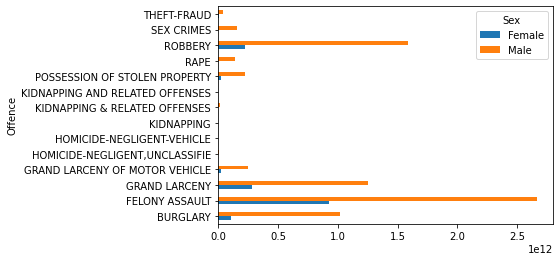

In [52]:
# Does not look like there is.
OffencesbySex = pd.pivot_table(CleanData,values="ARREST_KEY",index="Offence",columns="Sex",aggfunc=np.sum)
OffencesbySex.plot.barh()

<AxesSubplot:ylabel='Offence Type'>

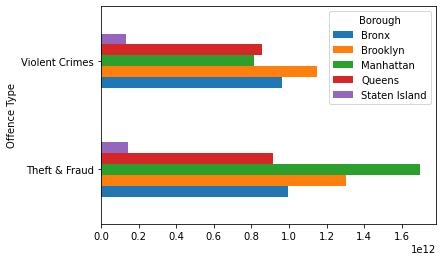

In [53]:
# Breaking out the 2 types to compare by borough 
OffenceBorough = pd.pivot_table(CleanData,values="ARREST_KEY",index="Offence Type",columns="Borough",aggfunc=np.sum)
OffenceBorough.plot.barh()

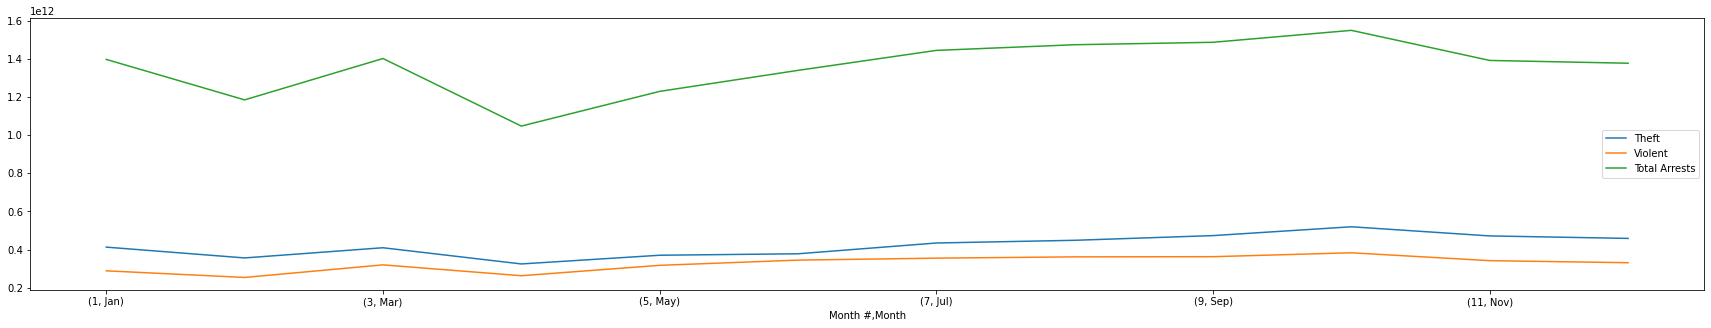

In [54]:
# Comparing all the felony arrest data to the violent crimes and thefts over the year.
TheftArrestsbyMonth.plot(figsize=(30,5),label='Theft')
ViolentArrestsbyMonth.plot(figsize=(30,5),label='Violent')
ArrestsbyMonth.plot(figsize=(30,5),label='Total Arrests')
plt.legend()

### Conclusion
    There is deffinately a significant amount of arrests of black men so it seems no matter the offence they will have the most arrests.
    It seems that there are significant more arrests of males over females and have to wonder if this points to a gender bias.
    When looking at the amount of arrests over the year both violent crimes and theft related crimes seem to follow the norm set by total felony arrest.
    